<a href="https://colab.research.google.com/github/souvikg123/SOUVIK/blob/master/Handwritten_digits_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [61]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [62]:
X_train = X_train/255 #Scaling the data
X_test = X_test/255

In [63]:
len(X_train)

60000

In [64]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

In [66]:
X_test[0].shape

(28, 28)

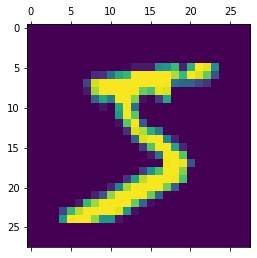

In [67]:
plt.matshow(X_train[0])

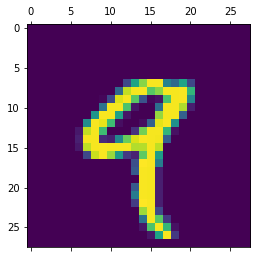

In [68]:
plt.matshow(X_train[4])

In [69]:
y_train[2]

4

In [70]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [71]:
model = keras.Sequential([
                          keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid'
)])  #here out has 10 neurons and input 784 and activation function is sigmoid
model.compile (
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7259 - accuracy: 0.8141
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3153 - accuracy: 0.9113
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2847 - accuracy: 0.9195
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2696 - accuracy: 0.9255
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9268


In [72]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9274


[0.2664792239665985, 0.9273999929428101]

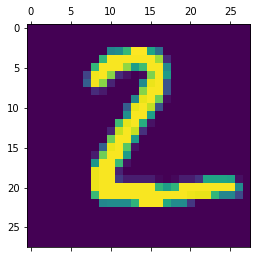

In [73]:
plt.matshow(X_test[1])

In [76]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([3.6335999e-01, 2.5788844e-03, 9.9936318e-01, 3.6048669e-01,
       6.6289968e-10, 8.1765646e-01, 8.4866500e-01, 5.5256521e-13,
       1.4348072e-01, 1.8787971e-09], dtype=float32)

In [77]:
np.argmax(y_predicted[1])

2

In [79]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [80]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [84]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,    8,    2,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    6,  918,   19,    8,    5,   12,   11,   45,    3],
       [   3,    0,   15,  922,    1,   23,    2,   10,   27,    7],
       [   1,    1,    5,    2,  927,    0,    8,    3,   11,   24],
       [   7,    2,    3,   30,    9,  783,   14,    4,   34,    6],
       [   7,    3,    4,    1,    7,   11,  918,    2,    5,    0],
       [   1,    5,   20,    9,    9,    1,    0,  942,    4,   37],
       [   6,    6,    6,   18,    9,   20,    9,    9,  885,    6],
       [   7,    6,    2,    9,   37,    7,    0,   19,   13,  909]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

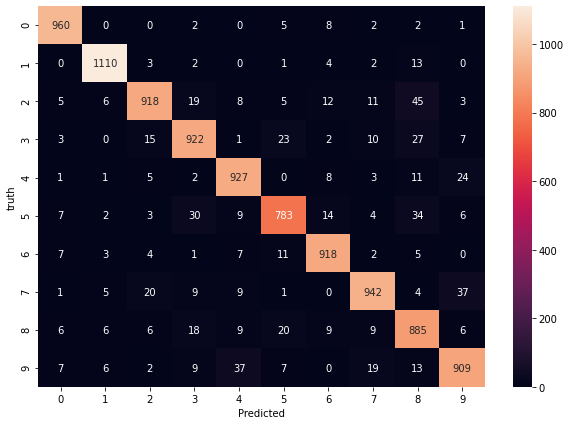

In [86]:
#for better visualization using seaborn library
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [90]:
#now lets use hidden layer and check the accuracy
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
]) #100 hidden layers with Relu activation function
model.compile (
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4569 - accuracy: 0.8705
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1302 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0922 - accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9840


In [91]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9768


[0.07382067292928696, 0.9768000245094299]

In [95]:
#if I dont want to use flattened array
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(100, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
]) #100 hidden layers with Relu activation function
model.compile (
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4587 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1324 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0849 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0490 - accuracy: 0.9846
